In [6]:
import sys;sys.path.append("../")
from painter.tests.test_pconv_layer import LayerTestModel
from painter.data.openimages_dataset import OpenImages
from painter.imports import *
from painter.utils import *
# from painter.networks.layers import PartialConv
%load_ext autoreload
%autoreload 2
 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import torchsummary

In [7]:
test_model = LayerTestModel().to(device)

In [9]:
dataset = OpenImages((192,192),datatype="train")

>> Found 55116 masks in D:\myown\storage\inpainting-dataset\masks\train


In [10]:

torchsummary.summary(test_model, [(3, 192,192),(3, 192,192)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 190, 190]              84
            Conv2d-2          [-1, 3, 190, 190]              81
       PartialConv-3  [[-1, 3, 190, 190], [-1, 3, 190, 190]]               0
            Conv2d-4          [-1, 8, 188, 188]             224
            Conv2d-5          [-1, 8, 188, 188]             216
       PartialConv-6  [[-1, 8, 188, 188], [-1, 8, 188, 188]]               0
            Conv2d-7         [-1, 16, 186, 186]           1,168
            Conv2d-8         [-1, 16, 186, 186]           1,152
       PartialConv-9  [[-1, 16, 186, 186], [-1, 16, 186, 186]]               0
           Conv2d-10         [-1, 32, 184, 184]           4,640
           Conv2d-11         [-1, 32, 184, 184]           4,608
      PartialConv-12  [[-1, 32, 184, 184], [-1, 32, 184, 184]]               0
           Conv2d-13         [-1, 32, 182, 182]

C:\Users\user\Anaconda3\envs\myenv\lib\site-packages\torchsummary\torchsummary.py:93: RuntimeWarning: overflow encountered in long_scalars
  total_output += np.prod(summary[layer]["output_shape"])


Shape of image is: torch.Size([3, 192, 192])


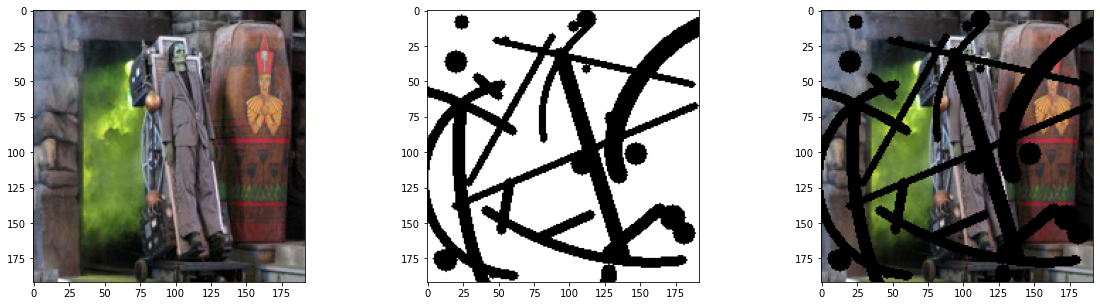

(tensor(0.0039), tensor(0.)) (tensor(2.6400), tensor(-2.1179)) (tensor(2.6400), tensor(-2.1179))


In [11]:
import matplotlib.pyplot as plt
data = dataset[190]
img = data["ground_truth"]
shape = img.shape
print(f"Shape of image is: {shape}")
masked_img =  data["input"]
mask = data["mask"]
_, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].imshow(im_convert(img))
axes[1].imshow(im_convert(mask,denormalize=False)*255)
axes[2].imshow(im_convert(masked_img,denormalize=True))
plt.show()
print(minmax(mask),minmax(masked_img),minmax(img))

In [12]:
formatted_img = masked_img.unsqueeze(0)
formatted_mask = mask.unsqueeze(0)
output_img, o1, o2, o3, o4, o5, o6,o7,o8 = test_model(formatted_img,formatted_mask)

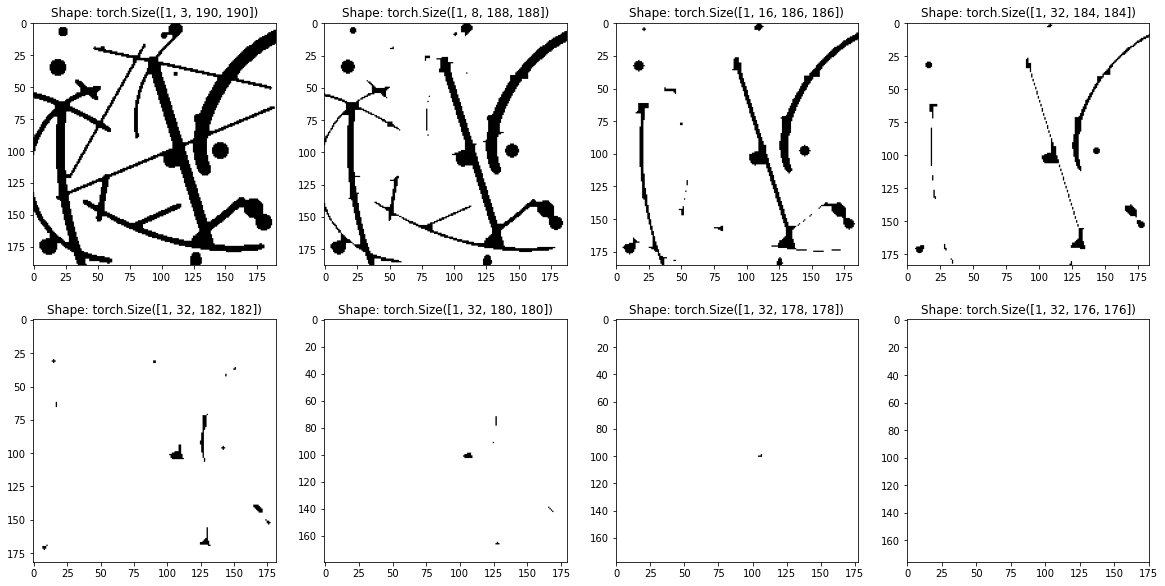

In [13]:

_, axes = plt.subplots(2, 4, figsize=(20, 10))
axes[0][0].imshow(o1[0,0,:,:], cmap = 'gray', vmin=0, vmax=1)
axes[0][1].imshow(o2[0,0, :,:], cmap = 'gray', vmin=0, vmax=1)
axes[0][2].imshow(o3[0,0, :,:], cmap = 'gray', vmin=0, vmax=1)
axes[0][3].imshow(o4[0,0,:,:], cmap = 'gray', vmin=0, vmax=1)
axes[1][0].imshow(o5[0,0,:,:], cmap = 'gray', vmin=0, vmax=1)
axes[1][1].imshow(o6[0,0,:,:], cmap = 'gray', vmin=0, vmax=1)
axes[1][2].imshow(o7[0,0,:,:], cmap = 'gray', vmin=0, vmax=1)
axes[1][3].imshow(o8[0,0,:,:], cmap = 'gray', vmin=0, vmax=1)
axes[0][0].set_title(f"Shape: {o1.shape}")
axes[0][1].set_title(f"Shape: {o2.shape}")
axes[0][2].set_title(f"Shape: {o3.shape}")
axes[0][3].set_title(f"Shape: {o4.shape}")
axes[1][0].set_title(f"Shape: {o5.shape}")
axes[1][1].set_title(f"Shape: {o6.shape}")
axes[1][2].set_title(f"Shape: {o7.shape}")
axes[1][3].set_title(f"Shape: {o8.shape}")
plt.show()

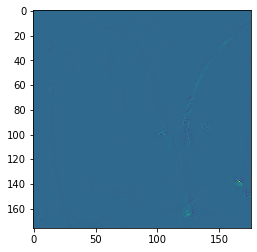

In [14]:
plt.imshow(output_img[0,2,:,:].detach().numpy())